# Convolution of "Echo" filter with a sample .wav file

#### Dependencies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
from scipy.io.wavfile import write 

#### Read the .wav sample audio file using wave module

In [2]:
wave_in = wave.open("guitar_sample.wav", 'r')
print(wave_in.getparams())

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=91392, comptype='NONE', compname='not compressed')


#### Converting the signal into a numpy array (16kz, 16bit sound)

In [3]:
signal = wave_in.readframes(-1)
signal = np.frombuffer(signal, 'Int16')

C:\new_software\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


#### Plot the input signal (without echo)

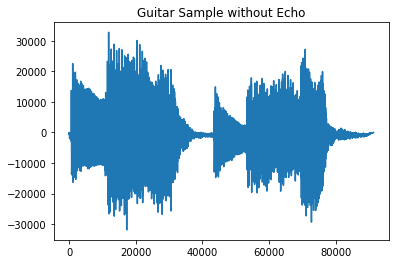

In [4]:
plt.plot(signal)
plt.title("Guitar Sample without Echo")
plt.show()

#### Define delta function and Convolve with original signal, Impulse Response

In [5]:
delta = np.array([1., 0., 0.])
noEcho = np.convolve(signal, delta)
print(noEcho.shape)
assert(np.abs(noEcho[:len(signal)] - signal).sum() < 0.0000001)

(91394,)


#### Saving the file with no Echo

In [6]:
noEcho = noEcho.astype(np.int16)
noEcho_out = write("guitar_sample_no_echo.wav", 44100, noEcho)

#### Create Echo Filter

In [7]:
echo_filter = np.zeros(44100)
echo_filter[0] = 1
echo_filter[11025] = 0.6
echo_filter[22050] = 0.3
echo_filter[33075] = 0.2
echo_filter[44099] = 0.1

#### Convolve the filter with no-echoed signal and save

In [8]:
withEcho = np.convolve(signal, echo_filter)
withEcho = withEcho.astype(np.int16)
withEcho_out = write("guitar_sample_with_echo.wav", 44100, withEcho)

#### Plot the output signal (with echo)

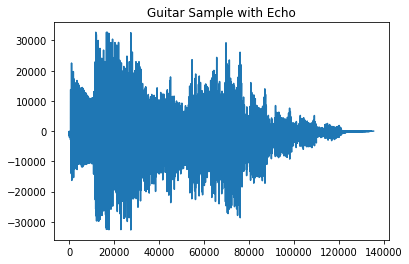

In [9]:
plt.plot(withEcho)
plt.title("Guitar Sample with Echo")
plt.show()